# 线性回归

本章介绍用线性模型处理回归问题。从简单问题开始，先处理一个响应变量和一个解释变量的一元问题。

然后，我们介绍多元线性回归问题（multiple linear regression），线性约束由多个解释变量构成。

紧接着，我们介绍多项式回归分析（polynomial regression问题），一种具有非线性关系的多元线性回归问题。

最后，我们介绍如果训练模型获取目标函数最小化的参数值。

在研究一个大数据集问题之前，我们先从一个小问题开始学习建立模型和学习算法。

<!-- TEASER_END-->

## 一元线性回归

上一章我们介绍过在监督学习问题中用训练数据来估计模型参数。训练数据由解释变量的历史观测值和对应的响应变量构成。模型可以预测不在训练数据中的解释变量对应的响应变量的值。回归问题的目标是预测出响应变量的连续值。本章我们将学习一些线性回归模型，后面会介绍训练数据，建模和学习算法，以及对每个方法的效果评估。首先，我们从简单的一元线性回归问题开始。

假设你想计算匹萨的价格。虽然看看菜单就知道了，不过也可以用机器学习方法建一个线性回归模型，通过分析匹萨的直径与价格的数据的线性关系，来预测任意直径匹萨的价格。我们先用scikit-learn写出回归模型，然后我们介绍模型的用法，以及将模型应用到具体问题中。假设我们查到了部分匹萨的直径与价格的数据，这就构成了训练数据，如下表所示：

|训练样本|直径（英寸）|价格（美元）|
|::|::|::|
|1|6|7|
|2|8|9|
|3|10|13|
|4|14|17.5|
|5|18|18|

我们可以用matplotlib画出图形：

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10)

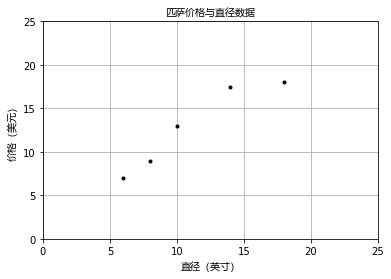

In [2]:
def runplt():
    plt.figure()
    plt.title('匹萨价格与直径数据',fontproperties=font)
    plt.xlabel('直径（英寸）',fontproperties=font)
    plt.ylabel('价格（美元）',fontproperties=font)
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    return plt

plt = runplt()
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.plot(X, y, 'k.')
plt.show()

上图中，'x'轴表示匹萨直径，'y'轴表示匹萨价格。能够看出，匹萨价格与其直径正相关，这与我们的日常经验也比较吻合，自然是越大越贵。下面我们就用scikit-learn来构建模型。

In [14]:
from sklearn.linear_model import LinearRegression
# 创建并拟合模型
model = LinearRegression()
model.fit(X, y)
print('预测一张12英寸匹萨价格：$%.2f' % model.predict([[12]])[0])

预测一张12英寸匹萨价格：$13.68


一元线性回归假设解释变量和响应变量之间存在线性关系；这个线性模型所构成的空间是一个超平面（hyperplane）。超平面是n维欧氏空间中余维度等于一的线性子空间，如平面中的直线、空间中的平面等，总比包含它的空间少一维。在一元线性回归中，一个维度是响应变量，另一个维度是解释变量，总共两维。因此，其超平面只有一维，就是一条线。

上述代码中`sklearn.linear_model.LinearRegression`类是一个估计器（estimator）。估计器依据观测值来预测结果。在scikit-learn里面，所有的估计器都带有`fit()`和`predict()`方法。`fit()`用来分析模型参数，`predict()`是通过`fit()`算出的模型参数构成的模型，对解释变量进行预测获得的值。因为所有的估计器都有这两种方法，所有scikit-learn很容易实验不同的模型。

`LinearRegression`类的`fit()`方法学习下面的一元线性回归模型：

$$y=\alpha+\beta x$$

$y$表示响应变量的预测值，本例指匹萨价格预测值，$x$是解释变量，本例指匹萨直径。截距$\alpha$和相关系数$\beta$是线性回归模型最关心的事情。

下图中的直线就是匹萨直径与价格的线性关系。用这个模型，你可以计算不同直径的价格，8英寸\$7.33，20英寸\$18.75。

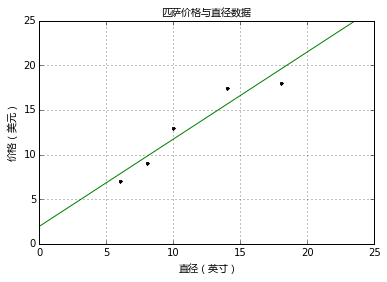

In [42]:
plt = runplt()
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')
plt.show()

一元线性回归拟合模型的参数估计常用方法是普通最小二乘法（ordinary least squares ）或线性最小二乘法（linear least squares）。首先，我们定义出拟合成本函数，然后对参数进行数理统计。

### 带成本函数的模型拟合评估

下图是由若干参数生成的回归直线。如何判断哪一条直线才是最佳拟合呢？

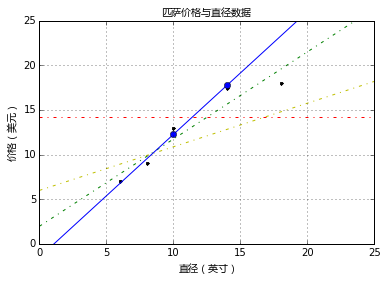

In [43]:
plt = runplt()
plt.plot(X, y, 'k.')
y3 = [14.25, 14.25, 14.25, 14.25]
y4 = y2 * 0.5 + 5
model.fit(X[1:-1], y[1:-1])
y5 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-.')
plt.plot(X2, y3, 'r-.')
plt.plot(X2, y4, 'y-.')
plt.plot(X2, y5, 'o-')
plt.show()

成本函数（cost function）也叫损失函数（loss function），用来定义模型与观测值的误差。模型预测的价格与训练集数据的差异称为残差（residuals）或训练误差（training errors）。后面我们会用模型计算测试集，那时模型预测的价格与测试集数据的差异称为预测误差（prediction errors）或训练误差（test errors）。

模型的残差是训练样本点与线性回归模型的纵向距离，如下图所示：

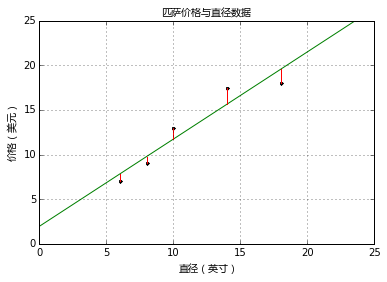

In [64]:
plt = runplt()
plt.plot(X, y, 'k.')
X2 = [[0], [10], [14], [25]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')

# 残差预测值
yr = model.predict(X)
for idx, x in enumerate(X):
    plt.plot([x, x], [y[idx], yr[idx]], 'r-')

plt.show()

我们可以通过残差之和最小化实现最佳拟合，也就是说模型预测的值与训练集的数据最接近就是最佳拟合。对模型的拟合度进行评估的函数称为残差平方和（residual sum of squares）成本函数。就是让所有训练数据与模型的残差的平方之和最小化，如下所示：

$$SS_{res} = \sum_{i=1}^n (y_i - f(x_i))^2$$

其中，$y_i$是观测值，$f(x_i)$是预测值。

残差平方和计算如下：

In [74]:
import numpy as np
print('残差平方和: %.2f' % np.mean((model.predict(X) - y) ** 2))

残差平方和: 1.75


有了成本函数，就要使其最小化获得参数。

### 解一元线性回归的最小二乘法

通过成本函数最小化获得参数，我们先求相关系数$\beta$。按照频率论的观点，我们首先需要计算$x$的方差和$x$与$y$的协方差。

方差是用来衡量样本分散程度的。如果样本全部相等，那么方差为0。方差越小，表示样本越集中，反正则样本越分散。方差计算公式如下：

$$var(x) = \frac {\sum_{i=1}^n (x_i - \bar x)^2} {n-1}$$

其中，$\bar x$是直径$x$的均值，$x_i$的训练集的第$i$个直径样本，$n$是样本数量。计算如下：

In [73]:
# 如果是Python2，加from __future__ import division
xbar = (6 + 8 + 10 + 14 + 18) / 5
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 + (14 - xbar)**2 + (18 - xbar)**2) / 4
print(variance)

23.2


Numpy里面有`var`方法可以直接计算方差，`ddof`参数是贝塞尔(无偏估计)校正系数（Bessel's correction），设置为1，可得[样本方差无偏估计量](https://blog.csdn.net/yangzhenzhen/article/details/73244592)

In [72]:
print(np.var([6, 8, 10, 14, 18], ddof=1))

23.2


协方差表示两个变量的总体的变化趋势。如果两个变量的变化趋势一致，也就是说如果其中一个大于自身的期望值，另外一个也大于自身的期望值，那么两个变量之间的协方差就是正值。 如果两个变量的变化趋势相反，即其中一个大于自身的期望值，另外一个却小于自身的期望值，那么两个变量之间的协方差就是负值。如果两个变量不相关，则协方差为0，变量线性无关不表示一定没有其他相关性。协方差公式如下：

$$cov(x,y) = \frac {\sum_{i=1}^n (x_i - \bar x)(y_i - \bar y)} {n-1}$$

其中，$\bar x$是直径$x$的均值，$x_i$的训练集的第$i$个直径样本，$\bar y$是价格$y$的均值，$y_i$的训练集的第$i$个价格样本，$n$是样本数量。计算如下：

In [75]:
ybar = (7 + 9 + 13 + 17.5 + 18) / 5
cov = ((6 - xbar) * (7 - ybar) + (8 - xbar) * (9 - ybar) + (10 - xbar) * (13 - ybar) +
(14 - xbar) * (17.5 - ybar) + (18 - xbar) * (18 - ybar)) / 4
print(cov)

22.65


Numpy里面有`cov`方法可以直接计算协方差。

In [76]:
import numpy as np
print(np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1])

22.65


现在有了方差和协方差，就可以计算相关系$\beta$了。

$$\beta = \frac {cov(x,y)} {var(x)}$$

$$\beta = \frac {22.65} {23.2} = 0.9762931034482758$$

算出$\beta$后，我们就可以计算$\alpha$了：

$$\alpha = \bar y - \beta {\bar x}$$

将前面的数据带入公式就可以求出$\alpha$了：

$$\alpha = 12.9 - 0.9762931034482758 \times 11.2 = 1.9655172413793114$$

这样就通过最小化成本函数求出模型参数了。把匹萨直径带入方程就可以求出对应的价格了，如11英寸直径价格\$12.70，18英寸直径价格\$19.54。

[协方差与相关系数](https://www.cnblogs.com/sanshanyin/p/5397091.html)

## 模型评估

前面我们用学习算法对训练集进行估计，得出了模型的参数。如何评价模型在现实中的表现呢？现在让我们假设有另一组数据，作为测试集进行评估。

|训练样本|直径（英寸）|价格（美元）|预测值（美元）|
|::|::|::|::|
|1|8|11|9.7759|
|2|9|8.5|10.7522|
|3|11|15|12.7048|
|4|16|18|17.5863|
|5|12|11|13.6811|

有些度量方法可以用来评估预测效果，我们用R方（r-squared）评估匹萨价格预测的效果。R方也叫确定系数（coefficient of determination），表示模型对现实数据拟合的程度。计算R方的方法有几种。一元线性回归中R方等于皮尔逊积矩相关系数（Pearson product moment correlation coefficient或Pearson's r）的平方。

这种方法计算的R方一定介于0～1之间的正数。其他计算方法，包括scikit-learn中的方法，不是用皮尔逊积矩相关系数的平方计算的，因此当模型拟合效果很差的时候R方会是负值。下面我们用scikit-learn方法来计算R方。

首先，我们需要计算样本总体平方和，$\bar y$是价格$y$的均值，$y_i$的训练集的第$i$个价格样本，$n$是样本数量。

$$SS_{tot} = \sum_{i=1}^n (y_i - \bar y)^2$$

$$SS_{tot} = (11 - 12.7)^2 + (8.5 - 12.7)^2 + \cdots +(11 - 12.7)^2$$ = 56.8

然后，我们计算残差平方和，和前面的一样：

$$SS_{res} = \sum_{i=1}^n (y_i - f(x_i))^2$$

$$SS_{res} = (11 - 9.7759)^2 + (8.5 - 10.7522)^2 + \cdots + (11 - 13.6811)^2 = 19.19821359$$

最后用下面的公式计算R方：

$$R^2 = 1 - \frac {SS_{res}} {SS_{tot}}$$

$$R^2 = 1 - \frac {19.19821359} {56.8} = 0.6620032818661972$$

R方是0.6620说明测试集里面过半数的价格都可以通过模型解释。现在，让我们用scikit-learn来验证一下。`LinearRegression`的`score`方法可以计算R方：

In [86]:
# 测试集
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
model = LinearRegression()
model.fit(X, y)
model.score(X_test, y_test)

0.66200528638545175

[回归评价指标](https://blog.csdn.net/skullFang/article/details/79107127)

## 多元线性回归

可以看出匹萨价格预测的模型R方值并不显著。如何改进呢？

回顾一下自己的生活经验，匹萨的价格其实还会受到其他因素的影响。比如，匹萨的价格还与上面的辅料有关。让我们再为模型增加一个解释变量。用一元线性回归已经无法解决了，我们可以用更具一般性的模型来表示，即多元线性回归。

$$y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$$

写成矩阵形式如下：

$$Y = X \beta$$

一元线性回归可以写成如下形式：

$$
\begin{bmatrix}
Y_1\\
Y_2\\
\vdots\\
Y_n\\
\end{bmatrix}
=
\begin{bmatrix}
\alpha + \beta X_1\\
\alpha + \beta X_2\\
\vdots\\
\alpha + \beta X_n\\
\end{bmatrix}
=
\begin{bmatrix}
1 & X_1\\
1 & X_2\\
\vdots & \vdots\\
1 & X_n\\
\end{bmatrix}
\times
\begin{bmatrix}
\alpha\\
\beta\\
\end{bmatrix}
$$

其中，$Y$是训练集的响应变量列向量，$\beta$是模型参数列向量。$X$称为设计矩阵，是$m \times n$维训练集的解释变量矩阵。$m$是训练集样本数量，$n$是解释变量个数。增加辅料的匹萨价格预测模型训练集如下表所示：

|训练样本|直径（英寸）|辅料种类|价格（美元）|
|::|::|::|::|
|1|8|11|9.7759|
|2|9|8.5|10.7522|
|3|11|15|12.7048|
|4|16|18|17.5863|
|5|12|11|13.6811|

我们同时要升级测试集数据：

|测试样本|直径（英寸）|辅料种类|价格（美元）|
|::|::|::|::|
|1|8|2|11|
|2|9|0|8.5|
|3|11|2|15|
|4|16|2|18|
|5|12|0|11|

我们的学习算法评估三个参数的值：两个相关因子和一个截距。$\beta$的求解方法可以通过矩阵运算来实现。

$$Y = X \beta$$

矩阵没有除法运算（详见线性代数相关内容），所以用矩阵的转置运算和逆运算来实现：

$$\beta = (X^TX)^{-1}X^TY $$

通过Numpy的矩阵操作就可以完成：

In [1]:
from numpy.linalg import inv
from numpy import dot, transpose
X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


Numpy也提供了最小二乘法函数来实现这一过程：

In [4]:
from numpy.linalg import lstsq
print(lstsq(X, y)[0])

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


有了参数，我们就来更新价格预测模型：

In [1]:
from sklearn.linear_model import LinearRegression
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted: [ 10.06250019], Target: [11]
Predicted: [ 10.28125019], Target: [8.5]
Predicted: [ 13.09375019], Target: [15]
Predicted: [ 18.14583353], Target: [18]
Predicted: [ 13.31250019], Target: [11]
R-squared: 0.77


增加解释变量让模型拟合效果更好了。后面我们会论述一个问题：为什么只用一个测试集评估一个模型的效果是不准确的，如何通过将测试集数据分块的方法来测试，让模型的测试效果更可靠。不过现在我们可以认为，匹萨价格预测问题，多元回归确实比一元回归效果更好。假如解释变量和响应变量的关系不是线性的呢？下面我们来研究一个特别的多元线性回归的情况，可以用来构建非线性关系模型。

## 多项式回归

上例中，我们假设解释变量和响应变量的关系是线性的。真实情况未必如此。下面我们用多项式回归，一种特殊的多元线性回归方法，增加了指数项（$x$的次数大于1）。现实世界中的曲线关系都是通过增加多项式实现的，其实现方式和多元线性回归类似。本例还用一个解释变量，匹萨直径。让我们用下面的数据对两种模型做个比较：

|训练样本|直径（英寸）|价格（美元）|
|::|::|::|
|1|6|7|
|2|8|9|
|3|10|13|
|4|14|17.5|
|5|18|18|

|测试样本|直径（英寸）|价格（美元）|
|::|::|::|
|1|6|7|
|2|8|9|
|3|10|13|
|4|14|17.5|

二次回归（Quadratic Regression），即回归方程有个二次项，公式如下：

$$y = \alpha + \beta_1 x + \beta_2 x^2$$

我们只用一个解释变量，但是模型有三项，通过第三项（二次项）来实现曲线关系。`PolynomialFeatures`转换器可以用来解决这个问题。代码如下：

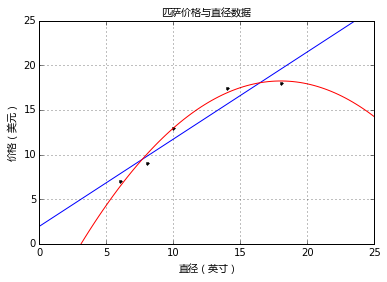

[[6], [8], [10], [14], [18]]
[[  1   6  36]
 [  1   8  64]
 [  1  10 100]
 [  1  14 196]
 [  1  18 324]]
[[6], [8], [11], [16]]
[[  1   6  36]
 [  1   8  64]
 [  1  11 121]
 [  1  16 256]]
一元线性回归 r-squared 0.809726832467
二次回归 r-squared 0.867544458591


In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt = runplt()
plt.plot(X_train, y_train, 'k.')
plt.plot(xx, yy)
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')
plt.show()
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('一元线性回归 r-squared', regressor.score(X_test, y_test))
print('二次回归 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))

效果如上图所示，直线为一元线性回归（R方0.81），曲线为二次回归（R方0.87），其拟合效果更佳。还有三次回归，就是再增加一个立方项（$\beta_3 x^3$）。同样方法拟合，效果如下图所示：

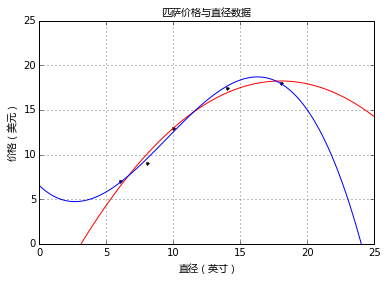

[[   1    6   36  216]
 [   1    8   64  512]
 [   1   10  100 1000]
 [   1   14  196 2744]
 [   1   18  324 5832]]
[[   1    6   36  216]
 [   1    8   64  512]
 [   1   11  121 1331]
 [   1   16  256 4096]]
二次回归 r-squared 0.867544458591
三次回归 r-squared 0.835692454062


In [33]:
plt = runplt()
plt.plot(X_train, y_train, 'k.')

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')

cubic_featurizer = PolynomialFeatures(degree=3)
X_train_cubic = cubic_featurizer.fit_transform(X_train)
X_test_cubic = cubic_featurizer.transform(X_test)
regressor_cubic = LinearRegression()
regressor_cubic.fit(X_train_cubic, y_train)
xx_cubic = cubic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_cubic.predict(xx_cubic))
plt.show()
print(X_train_cubic)
print(X_test_cubic)
print('二次回归 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))
print('三次回归 r-squared', regressor_cubic.score(X_test_cubic, y_test))

从图中可以看出，三次回归经过的点更多，但是R方值却没有二次回归高。下面我们再看一个更高阶的，七次回归，效果如下图所示：

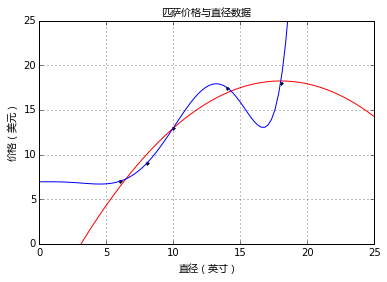

二次回归 r-squared 0.867544458591
七次回归 r-squared 0.487942421984


In [34]:
plt = runplt()
plt.plot(X_train, y_train, 'k.')

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 'r-')

seventh_featurizer = PolynomialFeatures(degree=7)
X_train_seventh = seventh_featurizer.fit_transform(X_train)
X_test_seventh = seventh_featurizer.transform(X_test)
regressor_seventh = LinearRegression()
regressor_seventh.fit(X_train_seventh, y_train)
xx_seventh = seventh_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_seventh.predict(xx_seventh))
plt.show()
print('二次回归 r-squared', regressor_quadratic.score(X_test_quadratic, y_test))
print('七次回归 r-squared', regressor_seventh.score(X_test_seventh, y_test))

可以看出，七次拟合的R方值更低，虽然其图形基本经过了所有的点。可以认为这是拟合过度（over-fitting）的情况。这种模型并没有从输入和输出中推导出一般的规律，而是记忆训练集的结果，这样在测试集的测试效果就不好了。

## 正则化

正则化（Regularization）是用来防止拟合过度的一堆方法。正则化向模型中增加信息，经常是一种对抗复杂性的手段。与奥卡姆剃刀原理（Occam's razor）所说的具有最少假设的论点是最好的观点类似。正则化就是用最简单的模型解释数据。

scikit-learn提供了一些方法来使线性回归模型正则化。其中之一是岭回归(Ridge Regression，RR，也叫Tikhonov regularization)，通过放弃最小二乘法的无偏性，以损失部分信息、降低精度为代价获得回归系数更为符合实际、更可靠的回归方法。岭回归增加L2范数项（相关系数向量平方和的平方根）来调整成本函数（残差平方和）：

$$RSS_{ridge} = \sum_{i=1}^n (y_i - x^T_i \beta)^2 + \lambda \sum_{j=1}^p \beta_j^2$$

$\lambda$是调整成本函数的超参数（hyperparameter），不能自动处理，需要手动调整一种参数。$\lambda$增大，成本函数就变大。

scikit-learn也提供了最小收缩和选择算子(Least absolute shrinkage and selection operator, LASSO)，增加L1范数项（相关系数向量平方和的平方根）来调整成本函数（残差平方和）：

$$RSS_{lasso} = \sum_{i=1}^n (y_i - x^T_i \beta)^2 + \lambda \sum_{j=1}^p \beta_j$$

LASSO方法会产生稀疏参数，大多数相关系数会变成0，模型只会保留一小部分特征。而岭回归还是会保留大多数尽可能小的相关系数。当两个变量相关时，LASSO方法会让其中一个变量的相关系数会变成0，而岭回归是将两个系数同时缩小。

scikit-learn还提供了弹性网（elastic net）正则化方法，通过线性组合L1和L2兼具LASSO和岭回归的内容。可以认为这两种方法是弹性网正则化的特例。

## 线性回归应用案例

前面我们通过一个小例子介绍了线性回归模型。下面我们用一个现实的数据集来应用线性回归算法。假如你去参加聚会，想喝最好的红酒，可以让朋友推荐，不过你觉得他们也不靠谱。作为科学控，你带了pH试纸和一堆测量工具来测酒的理化性质，然后选一个最好的，周围的小伙伴都无语了，你亮瞎了世界。

网上有相关的酒数据集可以参考，UCI机器学习项目的酒数据集收集了1599种酒的测试数据。收集完数据自然要用线性回归来研究一下，响应变量是0-10的整数值，我们也可以把这个问题看成是一个分类问题。不过本章还是把相应变量作为连续值来处理。

### 探索数据

scikit-learn作为机器学习系统，其探索数据的能力是不能与SPSS和R语言相媲美的。不过我们有Pandas库，可以方便的读取数据，完成描述性统计工作。我们通过描述性统计来设计模型。Pandas引入了R语言的dataframe，一种二维表格式异质（heterogeneous）数据结构。Pandas更多功能请见[文档](http://pandas.pydata.org)，这里只用一部分功能，都很容易使用。

首先，我们读取`.csv`文件生成dataframe：

In [5]:
import pandas as pd
df = pd.read_csv('mlslpic/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


就这么简单，我们通过`Dataframe.describe()`方法获得了一堆描述性统计结果。`pd.read_csv()`读取`.csv`文件。下面我们在用matplotlib看看，获得更直观的认识：

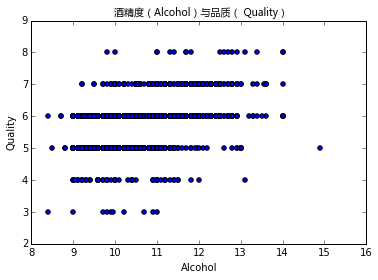

In [11]:
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('酒精度（Alcohol）与品质（ Quality）',fontproperties=font)
plt.show()

散点图显示酒精度（Alcohol）与品质有比较弱的正相关特性，整体呈左下-右上趋势，也就是说酒精度较高的酒具有较高的品质。挥发性酸度（volatile acidity）与品质呈现负相关特性：

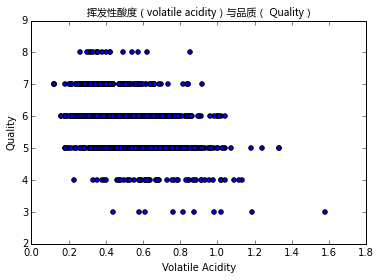

In [12]:
plt.scatter(df['volatile acidity'], df['quality'])
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.title('挥发性酸度（volatile acidity）与品质（ Quality）',fontproperties=font)
plt.show()

这些图都可以显示出响应变量与解释变量的相关性；让我们构建一个多元线性相关模型表述这些相关性。如何决定哪个变量应该在模型中？哪个可以不在？通过`Dataframe.corr()`计算两两的关联矩阵（correlation matrix）。关联矩阵进一步确认了酒精度与品质的正相关性，挥发性酸度与品质的负相关性。挥发性酸度越高，酒喝着就越向醋。总之，我们就假设好酒应该具有酒精度高、挥发性酸度低的特点，虽然这和品酒师的味觉可能不太一致。

### 拟合与评估模型

现在，我们把数据分成训练集和测试集，训练回归模型然后评估预测结果：

In [39]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
df = pd.read_csv('mlslpic/winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared:', regressor.score(X_test, y_test))

R-squared: 0.382777530798


开始和前面类似，加载数据，然后通过`train_test_split`把数据集分成训练集和测试集。两个分区的数据比例都可以通过参数设置。默认情况下，25%的数据被分配给测试集。最后，我们训练模型并用测试集测试。

R方值0.38表明38%的测试集数据都通过了测试。如果剩下的72%的数据被分到训练集，那效果就不一样了。我们可以用交叉检验的方法来实现一个更完善的效果评估。上一章我们介绍过这类方法，可以用来减少不同训练和测试数据集带来的变化。

In [33]:
from sklearn.cross_validation import cross_val_score
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
print(scores.mean(), scores)

0.290041628842 [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


这里`cross_val_score`函数可以帮助我们轻松实现交叉检验功能。`cv`参数将数据集分成了5份。每个分区都会轮流作为测试集使用。`cross_val_score`函数返回模拟器`score`方法的结果。R方结果是在0.13到0.37之间，均值0.29，是模拟器模拟出的结果，相比单个训练/测试集的效果要好。

让我们看看一些模型的预测品质与实际品质的图象显示结果：

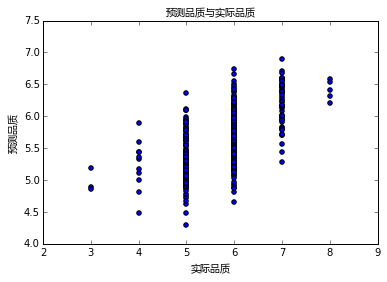

In [46]:
plt.scatter(y_test, y_predictions)
plt.xlabel('实际品质',fontproperties=font)
plt.ylabel('预测品质',fontproperties=font)
plt.title('预测品质与实际品质',fontproperties=font)
plt.show()

和假设一致，预测品质很少和实际品质完全一致。由于绝大多数训练数据都是一般品质的酒，所以这个模型更适合预测一般质量的酒。

## 梯度下降法拟合模型

前面的内容都是通过最小化成本函数来计算参数的：

$$\beta = (X^TX)^{-1}X^TY $$

这里$X$是解释变量矩阵，当变量很多（上万个）的时候，$X^TX$计算量会非常大。另外，如果$X^TX$的行列式为0，即奇异矩阵，那么就无法求逆矩阵了。这里我们介绍另一种参数估计的方法，梯度下降法（gradient descent）。拟合的目标并没有变，我们还是用成本函数最小化来进行参数估计。

梯度下降法被比喻成一种方法，一个人蒙着眼睛去找从山坡到溪谷最深处的路。他看不到地形图，所以只能沿着最陡峭的方向一步一步往前走。每一步的大小与地势陡峭的程度成正比。如果地势很陡峭，他就走一大步，因为他相信他仍在高出，还没有错过溪谷的最低点。如果地势比较平坦，他就走一小步。这时如果再走大步，可能会与最低点失之交臂。如果真那样，他就需要改变方向，重新朝着溪谷的最低点前进。他就这样一步一步的走啊走，直到有一个点走不动了，因为路是平的了，于是他卸下眼罩，已经到了谷底深处，小龙女在等他。

通常，梯度下降算法是用来评估函数的局部最小值的。我们前面用的成本函数如下：

$$SS_{res} = \sum_{i=1}^n (y_i - f(x_i))^2$$

可以用梯度下降法来找出成本函数最小的模型参数值。梯度下降法会在每一步走完后，计算对应位置的导数，然后沿着梯度（变化最快的方向）相反的方向前进。总是垂直于等高线。

需要注意的是，梯度下降法来找出成本函数的局部最小值。一个三维凸（convex）函数所有点构成的图行像一个碗。碗底就是唯一局部最小值。非凸函数可能有若干个局部最小值，也就是说整个图形看着像是有多个波峰和波谷。梯度下降法只能保证找到的是局部最小值，并非全局最小值。残差平方和构成的成本函数是凸函数，所以梯度下降法可以找到全局最小值。

梯度下降法的一个重要超参数是步长（learning rate），用来控制蒙眼人步子的大小，就是下降幅度。如果步长足够小，那么成本函数每次迭代都会缩小，直到梯度下降法找到了最优参数为止。但是，步长缩小的过程中，计算的时间就会不断增加。如果步长太大，这个人可能会重复越过谷底，也就是梯度下降法可能在最优值附近摇摆不定。

如果按照每次迭代后用于更新模型参数的训练样本数量划分，有两种梯度下降法。批量梯度下降（Batch gradient descent）每次迭代都用所有训练样本。随机梯度下降（Stochastic gradient descent，SGD）每次迭代都用一个训练样本，这个训练样本是随机选择的。当训练样本较多的时候，随机梯度下降法比批量梯度下降法更快找到最优参数。批量梯度下降法一个训练集只能产生一个结果。而SGD每次运行都会产生不同的结果。SGD也可能找不到最小值，因为升级权重的时候只用一个训练样本。它的近似值通常足够接近最小值，尤其是处理残差平方和这类凸函数的时候。

下面我们用scikit-learn的`SGDRegressor`类来计算模型参数。它可以通过优化不同的成本函数来拟合线性模型，默认成本函数为残差平方和。本例中，我们用波士顿住房数据的13个解释变量来预测房屋价格：

In [3]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

scikit-learn加载数据集的方法很简单。首先我们用`train_test_split`分割训练集和测试集。

In [4]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

然后用`StandardScaler`做归一化处理，后面会介绍。最后我们用交叉验证方法完成训练和测试：

In [11]:
regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print('交叉验证R方值:', scores)
print('交叉验证R方均值:', np.mean(scores))
regressor.fit_transform(X_train, y_train)
print('测试集R方值:', regressor.score(X_test, y_test))

交叉验证R方值: [ 0.64102297  0.65659839  0.80237287  0.67294193  0.57322387]
交叉验证R方均值: 0.669232006274
测试集R方值: 0.787333341357


## 总结

本章我们介绍了三类线性回归模型。首先，通过匹萨价格预测的例子介绍了一元线性回归，一个解释变量和一个响应变量的线性拟合。然后，我们讨论了多元线性回归，具有更一般形式的若干解释变量和一个响应变量的问题。最后，我们讨论了多项式回归，一种特殊的多元线性模型，体系了解释变量和响应变量的非线性特征。这三种模型都是一般线性模型的具体形式，在第4章，从线性回归到逻辑回归（Logistic Regression）。

我们将残差平方差最小化为目标来估计模型参数。首先，通过解析方法求解，我们介绍了梯度下降法，一种可以有效估计带许多解释变量的模型参数的优化方法。这章里的案例都很简单，很容易建模。下一章，我们介绍处理不同类型的解释变量的方法，包括分类数据、文字、图像。